In [1]:
import pandas as pd
import numpy as np
import datetime as dt

#df = pd.read_csv(r'C:\Users\lakebl6635\OneDrive - Nexus365\Documents\oxford documents\books\Dissertation\anambra solar irradiance.csv')

In [2]:
file = 'ninja_pv_anambra.csv'

df = pd.read_csv(file, skiprows = 3, usecols = ['local_time','electricity'], skipfooter = 49,\
                parse_dates = ['local_time'],\
                infer_datetime_format = True, dayfirst = True)

<ipython-input-2-56a6d5c2090c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, skiprows = 3, usecols = ['local_time','electricity'], skipfooter = 49,\


In [3]:
df['days'] = df.local_time.dt.dayofyear
df['week_days'] = df.local_time.dt.dayofweek
df['week_days'] = df.local_time.dt.dayofweek
df['Months'] = df.local_time.dt.month
df['Weeks'] = df.local_time.dt.week

<ipython-input-3-07a0033932d2>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Weeks'] = df.local_time.dt.week


In [4]:
df

,local_time,electricity,days,week_days,Months,Weeks
0,2019-01-01 01:00:00,0.0,1,1,1,1
1,2019-01-01 02:00:00,0.0,1,1,1,1
2,2019-01-01 03:00:00,0.0,1,1,1,1
3,2019-01-01 04:00:00,0.0,1,1,1,1
4,2019-01-01 05:00:00,0.0,1,1,1,1
...,...,...,...,...,...,...
8706,2019-12-29 19:00:00,0.0,363,6,12,52
8707,2019-12-29 20:00:00,0.0,363,6,12,52
8708,2019-12-29 21:00:00,0.0,363,6,12,52
8709,2019-12-29 22:00:00,0.0,363,6,12,52


In [5]:
Months_df = pd.DataFrame(df.groupby('Months').sum().electricity)
Months_df

,electricity
Months,
1,2338.093
2,1853.965
3,1634.957
4,1708.372
5,1583.228
6,1627.354
7,1644.599
8,1848.850
9,1682.936


In [6]:
df.groupby('Weeks').sum().electricity
#weeks = range(1,53)
#for week in weeks:
    #df.loc[df['Week'] == week].sum()
    #print(df.loc[df['Week'] == week].sum().electricity)
    #for week in 
Weeks_df = pd.DataFrame(df.groupby('Weeks').sum().electricity)
Weeks_df

,electricity
Weeks,
1,535.643
2,547.543
3,483.810
4,514.866
5,483.990
6,498.643
7,521.013
8,385.965
9,365.410


In [7]:
df.electricity.sum()

22632.866

In [8]:
sunday_outputs = []
Sundays = range(5, 364, 7)
for sunday in Sundays:
    sunday_outputs.append(df.loc[df['days'] == sunday].sum().electricity)

In [9]:
saturday_outputs = []
Saturdays = range(4, 364, 7)
for saturday in Saturdays:
    saturday_outputs.append(df.loc[df['days'] == saturday].sum().electricity)

In [10]:
sunday_outputs

[95.125,
 82.53800000000001,
 80.767,
 100.77199999999999,
 49.607,
 85.52600000000001,
 71.08099999999999,
 42.036,
 67.617,
 57.888999999999996,
 47.242000000000004,
 41.81,
 45.286,
 68.444,
 34.017,
 52.706,
 53.641,
 38.426,
 59.884,
 65.187,
 37.238,
 64.303,
 61.463,
 63.2,
 52.492000000000004,
 62.468,
 68.097,
 58.622,
 52.03,
 54.941,
 62.012,
 49.407,
 67.347,
 53.083,
 63.43299999999999,
 51.187,
 67.09100000000001,
 51.635,
 61.048,
 98.88999999999999,
 57.741,
 95.523,
 63.232,
 28.985,
 59.167,
 49.8,
 95.962,
 75.324,
 101.73,
 94.217,
 99.755,
 102.102]

In [11]:
Weekend_df = pd.DataFrame(zip(saturday_outputs, sunday_outputs), columns = ['Saturday', 'Sunday'])
Weekend_df['total_weekend'] = Weekend_df['Saturday'] + Weekend_df['Sunday']
Weekend_df

#min(Weekend_df['total weekend'])

,Saturday,Sunday,total_weekend
0,65.322,95.125,160.447
1,64.433,82.538,146.971
2,60.817,80.767,141.584
3,75.149,100.772,175.921
4,83.407,49.607,133.014
5,98.454,85.526,183.980
6,80.060,71.081,151.141
7,54.020,42.036,96.056
8,31.191,67.617,98.808
9,41.283,57.889,99.172


In [12]:
Weekend_df.total_weekend.sum()

6544.181

<AxesSubplot:>

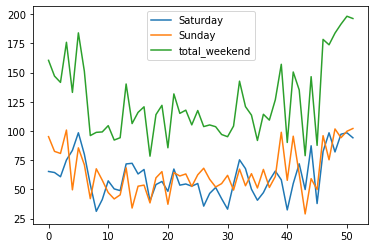

In [13]:
Weekend_df.plot()

<AxesSubplot:>

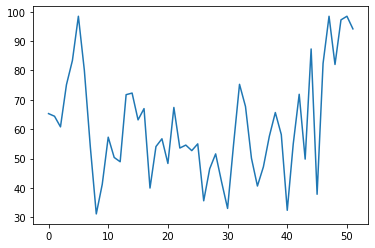

In [14]:
Weekend_df['Saturday'].plot()

In [15]:
#Months_df.to_csv('Monthly_energy.csv')
#Weeks_df.to_csv('Weekly_energy.csv')
#Weekend_df.to_csv('Weekend_energy.csv')

In [16]:
min(Weekend_df['total_weekend'])
Weekend_df.idxmin()

Saturday          8
Sunday           43
total_weekend    17
dtype: int64

In [17]:
max(Weekend_df['total_weekend'])
Weekend_df.idxmax()


Saturday         50
Sunday           51
total_weekend    50
dtype: int64